# Exploratory Data Analysis (EDA) Overview

In this notebook, we perform an in-depth exploratory data analysis (EDA) on the dataset to uncover key patterns, relationships, and insights. EDA is a critical step in understanding the structure of the data and preparing it for further analysis. Below are the main objectives of this analysis:

1. **Key Metrics and Distributions**:  
   We start by examining the summary statistics of the dataset to get an overview of the central tendencies, spread, and distribution of key numerical features. This includes analyzing measures such as mean, median, standard deviation, and range to assess the overall characteristics of the data.

2. **Sales Patterns by Month**:  
   Using time-series analysis, we explore how sales performance varies by month. The goal is to identify any seasonal trends, unexpected drops, or spikes in sales performance, helping to highlight key periods of interest.

3. **Multivariate Analysis**:  
   We delve into how numerical features interact with each other by using multivariate techniques. This allows us to uncover potential correlations and relationships between different variables in the dataset.

4. **Agent Trajectories Over Time**:  
   We examine the performance trajectories of individual agents across time, helping to identify trends and outliers in their performance, which can provide insights into agent-specific behaviors and performance dynamics.

5. **Innovative EDA**:  
   Finally, we go beyond traditional EDA to explore more advanced techniques and creative visualizations, aiming to uncover hidden insights or interesting patterns in the data that may not be immediately apparent.


# Import libraries and load data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Setting styles for better visualizations
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

# Create DataFrame
train_data_path = 'datasets/train_storming_round.csv'
df = pd.read_csv(train_data_path)

# Convert date columns to datetime
date_columns = ['agent_join_month', 'first_policy_sold_month', 'year_month']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Calculate time to first sale (in months)
df['months_to_first_sale'] = ((df['first_policy_sold_month'].dt.year - df['agent_join_month'].dt.year) * 12 + 
                              (df['first_policy_sold_month'].dt.month - df['agent_join_month'].dt.month))

# Print information about the dataset
print("Dataset Overview:")
print(f"Number of agents in sample: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\n")

Dataset Overview:
Number of agents in sample: 15308
Number of features: 24




# Summary Statistics for Key Metrics

Summary Statistics for Key Metrics

Agent Demographics:
          agent_age  months_to_first_sale
count  15308.000000          15308.000000
mean      40.585772             23.034165
std       11.688204             15.256349
min       20.000000             -3.000000
25%       31.000000             10.000000
50%       41.000000             22.000000
75%       51.000000             35.000000
max       60.000000             60.000000

Activity Metrics:
       unique_proposals_last_7_days  unique_proposals_last_15_days  \
count                  15308.000000                   15308.000000   
mean                       1.491246                       2.991116   
std                        1.119554                       2.001613   
min                        0.000000                       0.000000   
25%                        0.000000                       1.000000   
50%                        1.000000                       3.000000   
75%                        2.000000                      

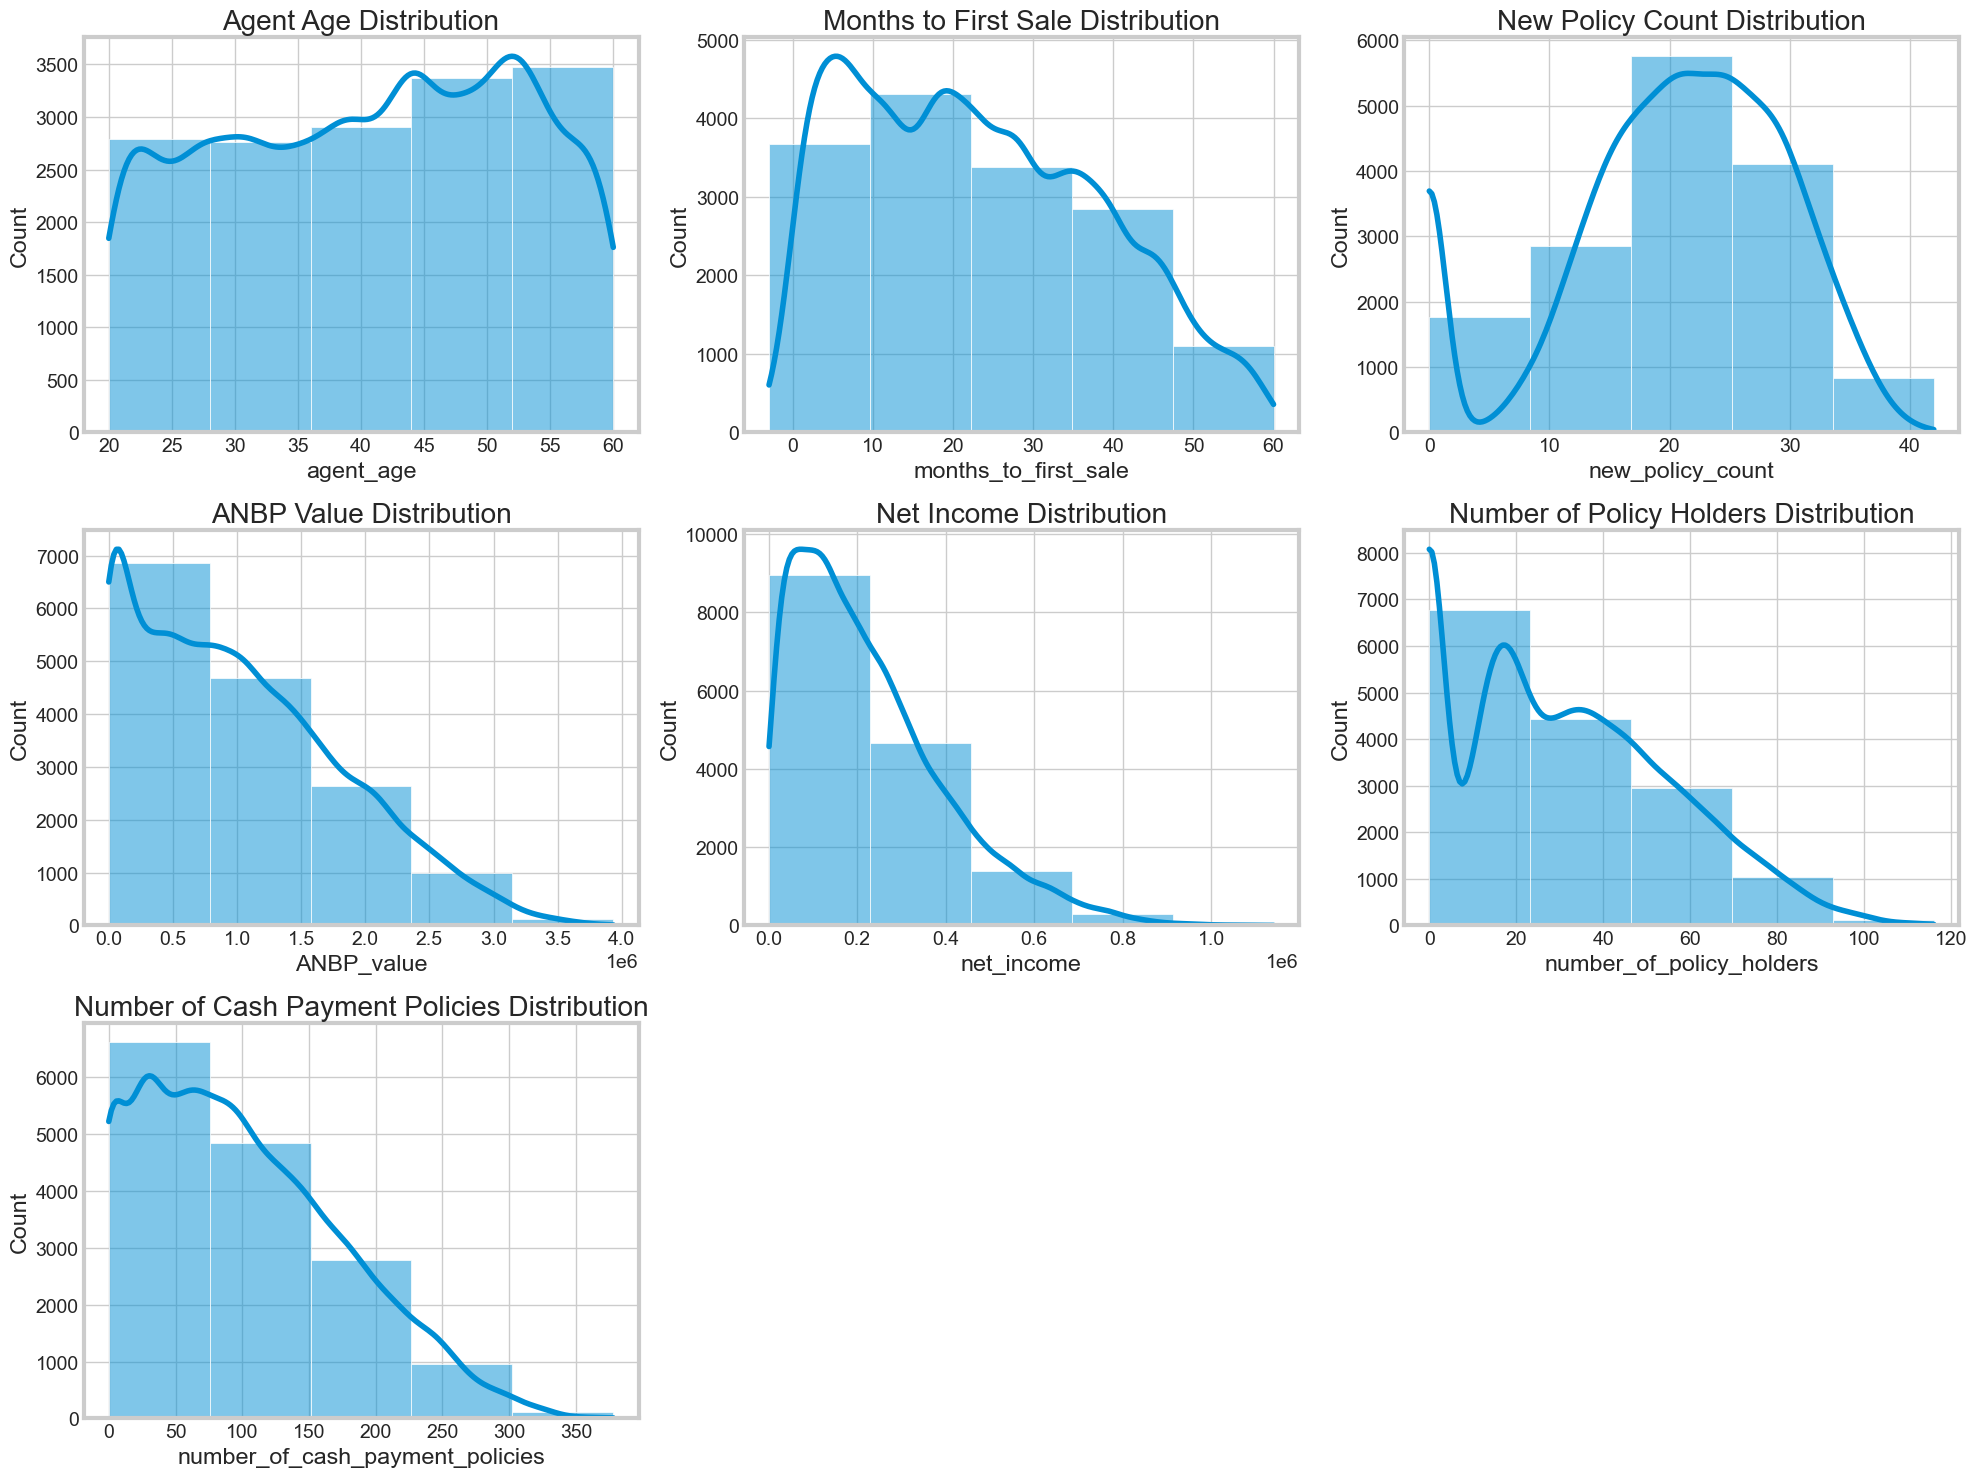

In [7]:

print("Summary Statistics for Key Metrics")
print("\nAgent Demographics:")
print(df[['agent_age', 'months_to_first_sale']].describe())

print("\nActivity Metrics:")
activity_cols = [col for col in df.columns if 'unique' in col]
print(df[activity_cols].describe())

print("\nPerformance Metrics:")
performance_cols = ['new_policy_count', 'ANBP_value', 'net_income', 'number_of_policy_holders', 'number_of_cash_payment_policies']
print(df[performance_cols].describe())

# Visualizing Distributions
plt.figure(figsize=(20, 15))

# Agent Age Distribution
plt.subplot(3, 3, 1)
sns.histplot(df['agent_age'], bins=5, kde=True)
plt.title('Agent Age Distribution')

# Months to First Sale
plt.subplot(3, 3, 2)
sns.histplot(df['months_to_first_sale'], bins=5, kde=True)
plt.title('Months to First Sale Distribution')

# New Policy Count
plt.subplot(3, 3, 3)
sns.histplot(df['new_policy_count'], bins=5, kde=True)
plt.title('New Policy Count Distribution')

# ANBP Value
plt.subplot(3, 3, 4)
sns.histplot(df['ANBP_value'], bins=5, kde=True)
plt.title('ANBP Value Distribution')

# Net Income
plt.subplot(3, 3, 5)
sns.histplot(df['net_income'], bins=5, kde=True)
plt.title('Net Income Distribution')

# Number of Policy Holders
plt.subplot(3, 3, 6)
sns.histplot(df['number_of_policy_holders'], bins=5, kde=True)
plt.title('Number of Policy Holders Distribution')

# Number of Cash Payment Policies
plt.subplot(3, 3, 7)
sns.histplot(df['number_of_cash_payment_policies'], bins=5, kde=True)
plt.title('Number of Cash Payment Policies Distribution')

plt.tight_layout()



# Multivariate Analysis 

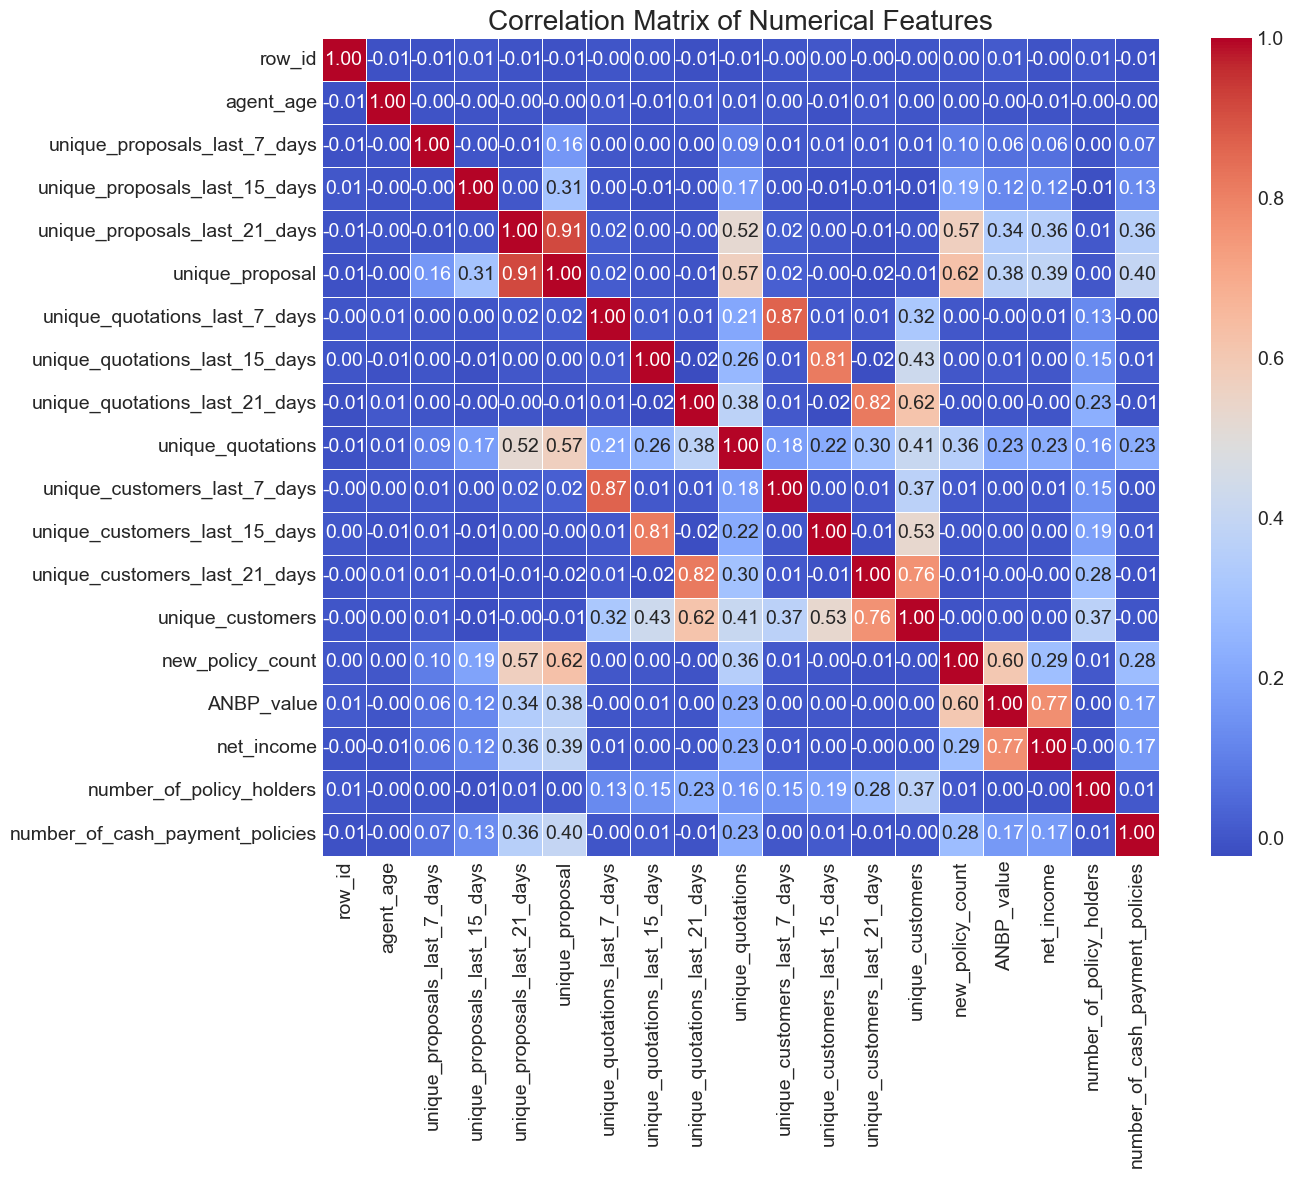

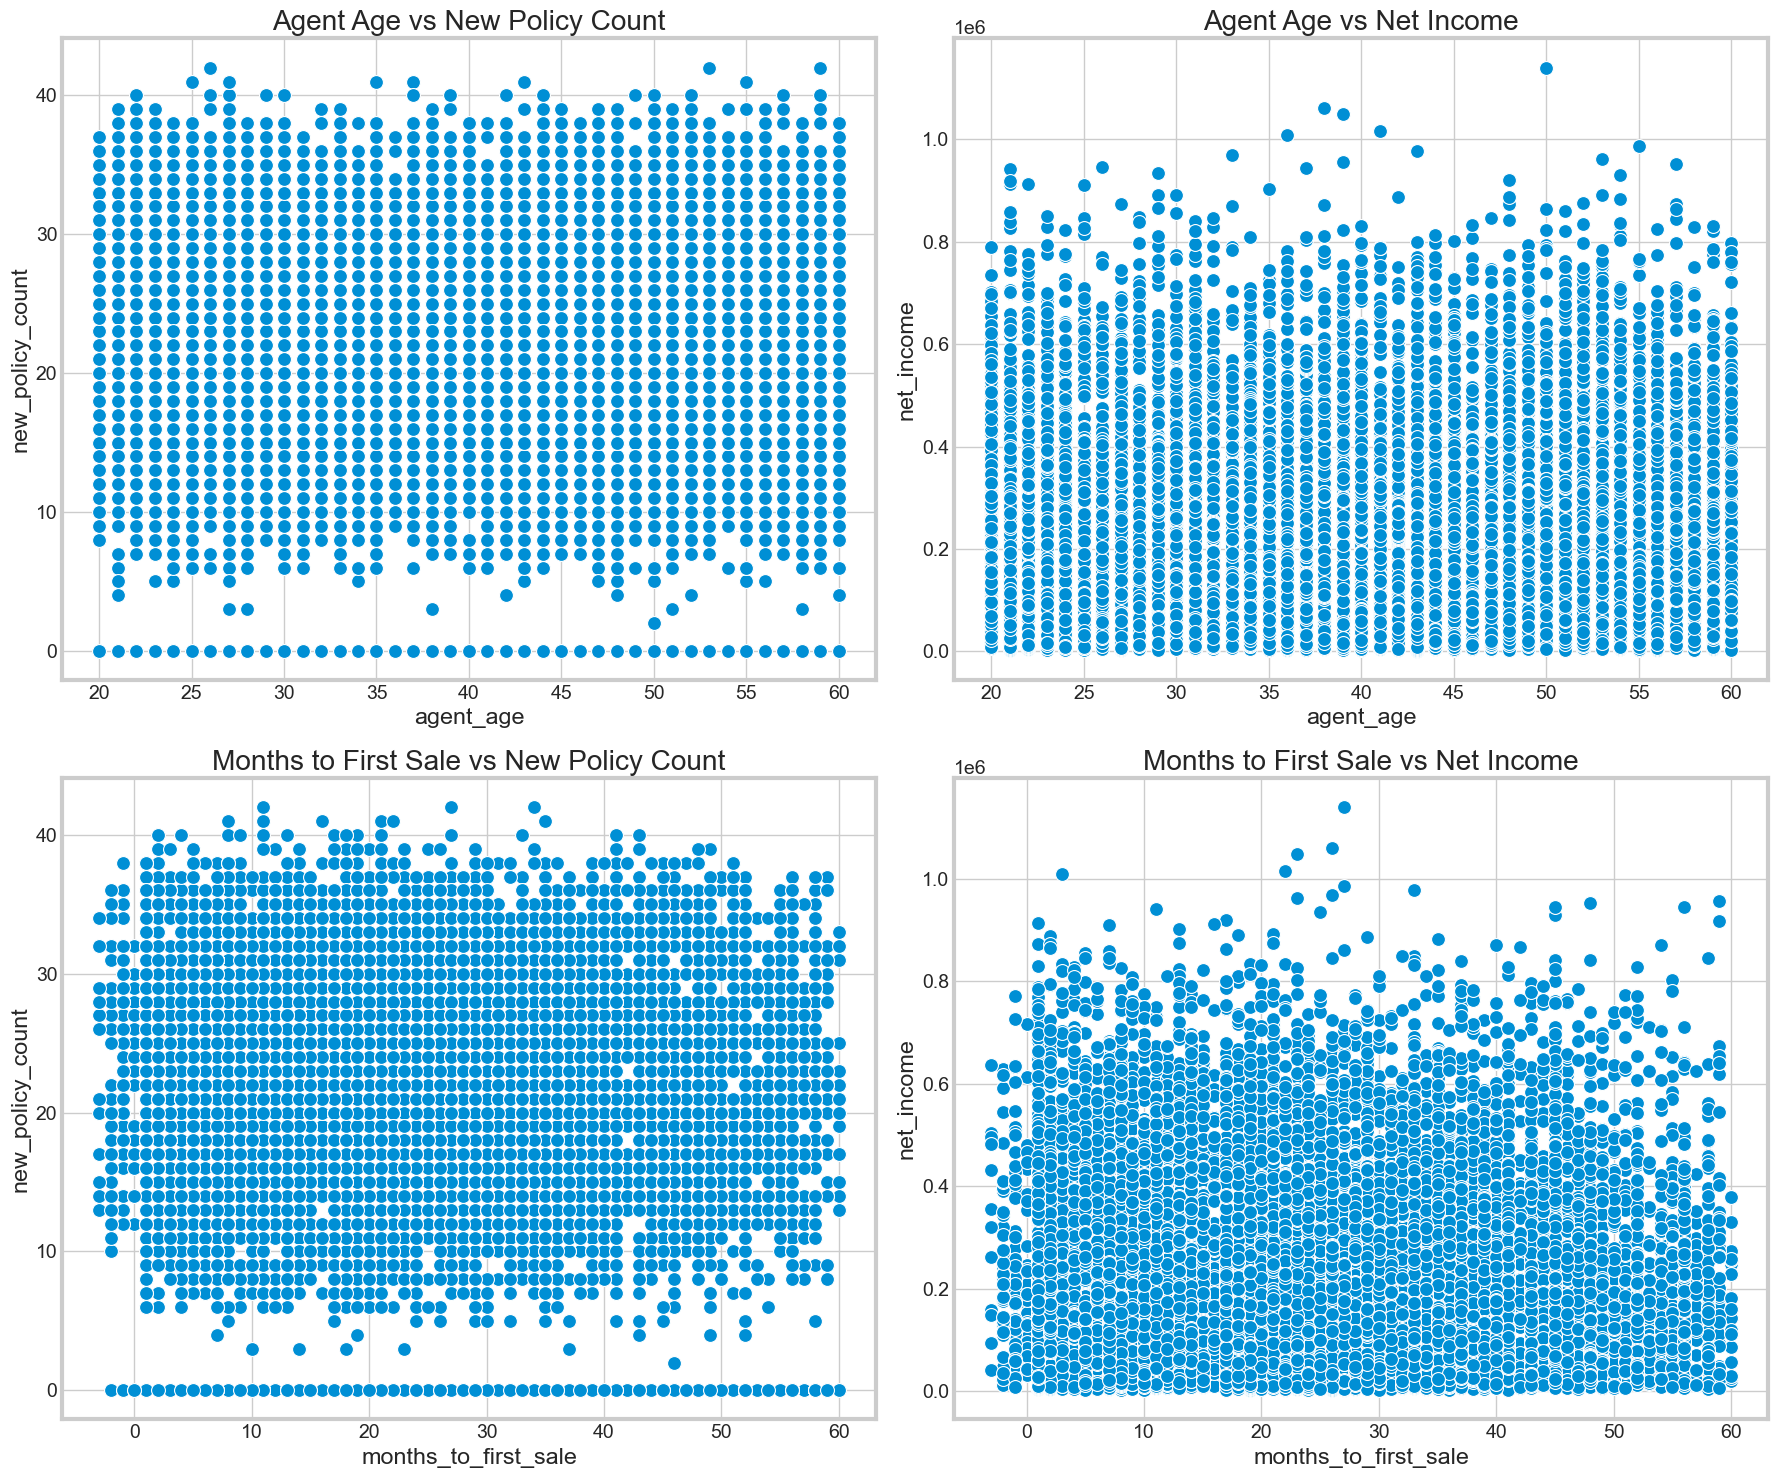

In [8]:
plt.figure(figsize=(14, 12))
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()

# Feature relationships
plt.figure(figsize=(18, 15))

# Age vs Performance
plt.subplot(2, 2, 1)
sns.scatterplot(x='agent_age', y='new_policy_count', data=df, s=100)
plt.title('Agent Age vs New Policy Count')

plt.subplot(2, 2, 2)
sns.scatterplot(x='agent_age', y='net_income', data=df, s=100)
plt.title('Agent Age vs Net Income')

# Time to First Sale vs Performance
plt.subplot(2, 2, 3)
sns.scatterplot(x='months_to_first_sale', y='new_policy_count', data=df, s=100)
plt.title('Months to First Sale vs New Policy Count')

plt.subplot(2, 2, 4)
sns.scatterplot(x='months_to_first_sale', y='net_income', data=df, s=100)
plt.title('Months to First Sale vs Net Income')

plt.tight_layout()



# Individual Agent Trajectories

In [9]:
# Create a parallel coordinates plot to visualize agent performance across multiple metrics
fig = px.parallel_coordinates(
    df, 
    color="new_policy_count",
    dimensions=['agent_age', 'months_to_first_sale', 'new_policy_count', 'ANBP_value', 'net_income', 
                'number_of_policy_holders', 'number_of_cash_payment_policies'],
    color_continuous_scale=px.colors.diverging.Tealrose,
    title='Agent Performance Profile Across Multiple Metrics'
)
fig.write_html('agent_profiles.html')

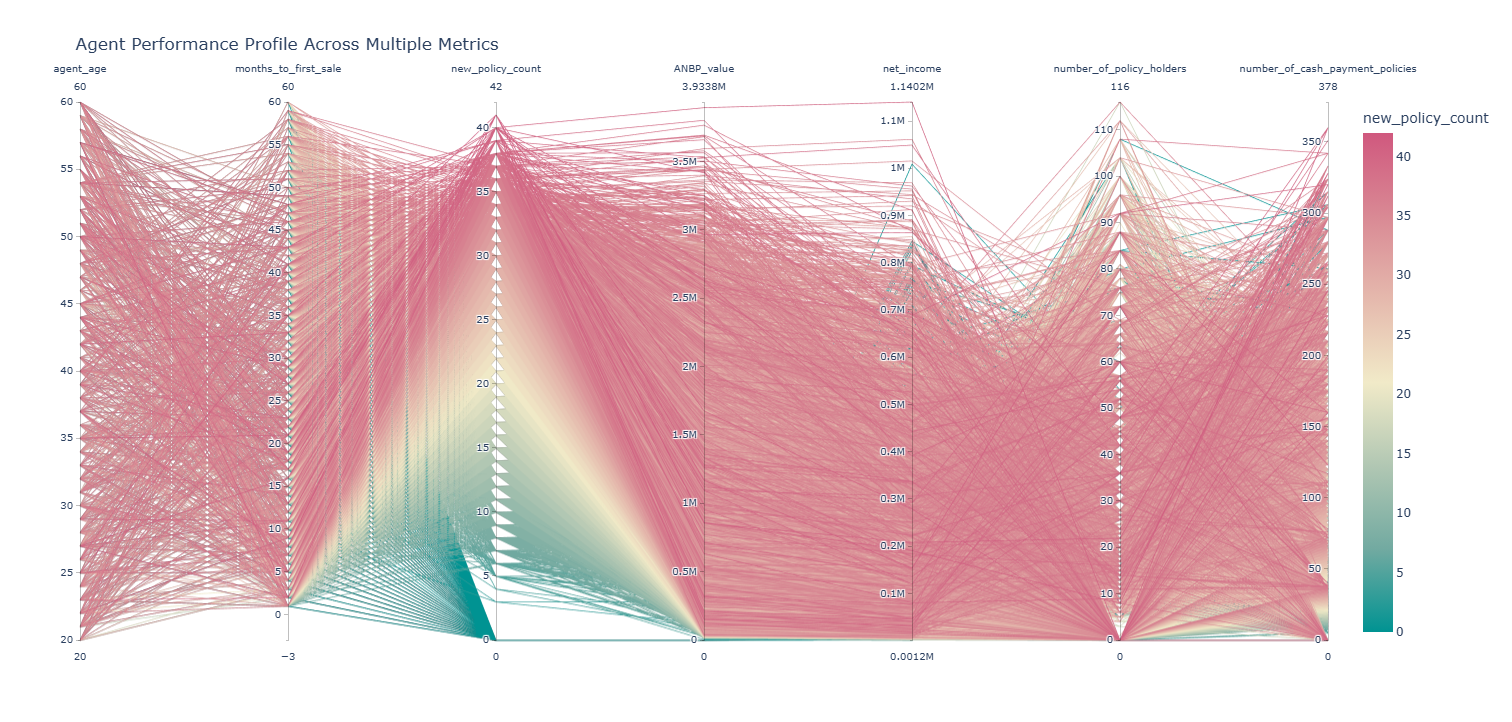

# Innovative EDA - Performance Index and Agent Categorization


5. Innovative EDA - Performance Index and Agent Categorization
     agent_code  performance_index performance_category
1696   68198d93           0.882554                 High
6041   bc913ebe           0.859864                 High
9077   f2c082c3           0.838250                 High
3143   3c26fc5a           0.828460                 High
6727   1a1279f8           0.820719                 High
...         ...                ...                  ...
4045   5da2a068           0.001782                  Low
2813   61b67baf           0.001550                  Low
7303   57480056           0.001170                  Low
4414   328e4201           0.000801                  Low
2334   c724fffa           0.000670                  Low

[15308 rows x 3 columns]

Additional Insights:
Average age of agents: 40.6 years
Average time to first sale: 23.0 months
Average new policy count: 20.3 policies
Average ANBP value: $1,025,337.79
Average net income: $228,041.39

Agents at Risk (with low performanc

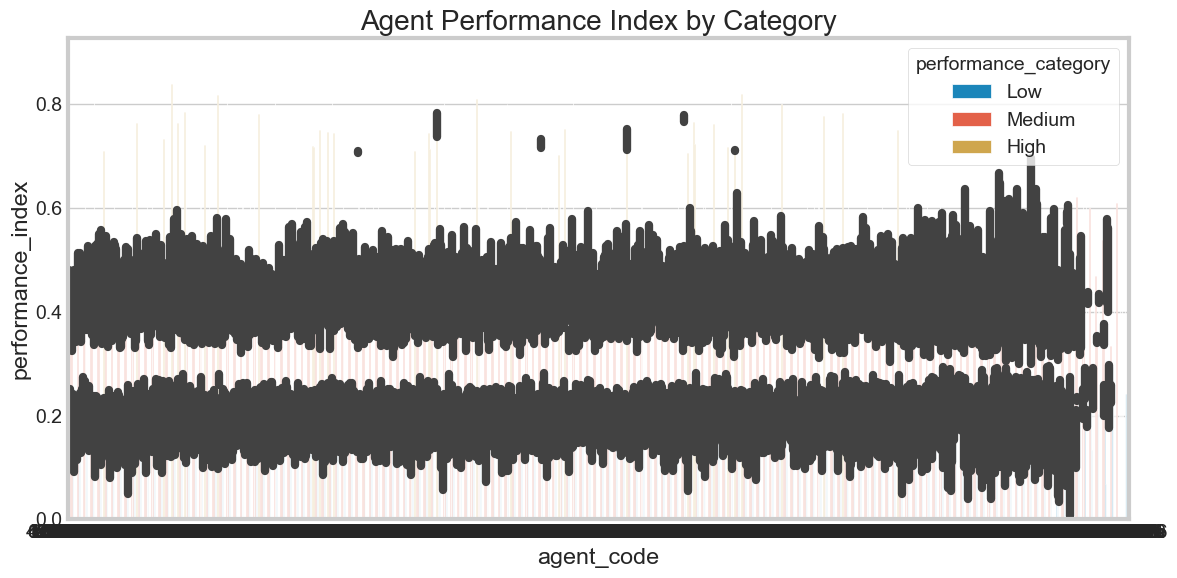

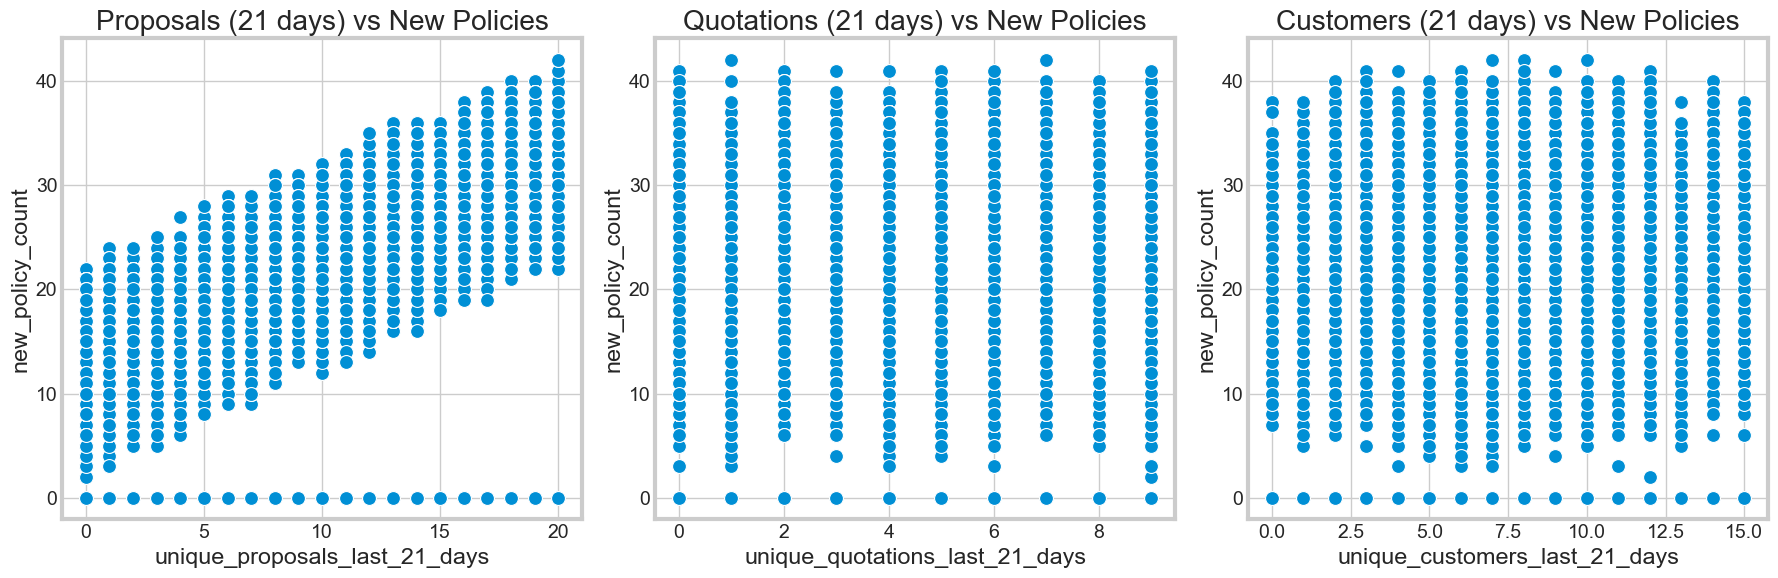

In [10]:
# Create a Performance Index
# Normalize and weight key performance indicators
df_scaled = df.copy()

# Function to min-max scale
def min_max_scale(series):
    if series.max() == series.min():
        return series * 0  # Return zeros if all values are the same
    return (series - series.min()) / (series.max() - series.min())

# Scale performance metrics
performance_metrics = ['new_policy_count', 'ANBP_value', 'net_income', 'number_of_policy_holders']
for metric in performance_metrics:
    df_scaled[f'{metric}_scaled'] = min_max_scale(df[metric])

# Create a weighted performance index
weights = {
    'new_policy_count_scaled': 0.3,
    'ANBP_value_scaled': 0.3,
    'net_income_scaled': 0.3,
    'number_of_policy_holders_scaled': 0.1
}

df_scaled['performance_index'] = sum(df_scaled[metric] * weight for metric, weight in weights.items())

# Categorize agents
def categorize_performance(score):
    if score < 0.3:
        return 'Low'
    elif score < 0.7:
        return 'Medium'
    else:
        return 'High'

df_scaled['performance_category'] = df_scaled['performance_index'].apply(categorize_performance)

print("\n5. Innovative EDA - Performance Index and Agent Categorization")
print(df_scaled[['agent_code', 'performance_index', 'performance_category']].sort_values('performance_index', ascending=False))

# Visualize Performance Index across agents
plt.figure(figsize=(12, 6))
sns.barplot(x='agent_code', y='performance_index', hue='performance_category', data=df_scaled)
plt.title('Agent Performance Index by Category')
plt.tight_layout()


# Visualize the relationship between activity metrics and performance
activity_vs_performance = [
    ('unique_proposals_last_21_days', 'new_policy_count', 'Proposals (21 days) vs New Policies'),
    ('unique_quotations_last_21_days', 'new_policy_count', 'Quotations (21 days) vs New Policies'),
    ('unique_customers_last_21_days', 'new_policy_count', 'Customers (21 days) vs New Policies')
]

plt.figure(figsize=(18, 6))
for i, (activity, performance, title) in enumerate(activity_vs_performance, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=activity, y=performance, data=df, s=100)
    plt.title(title)
plt.tight_layout()


# Additional insights
print("\nAdditional Insights:")
print(f"Average age of agents: {df['agent_age'].mean():.1f} years")
print(f"Average time to first sale: {df['months_to_first_sale'].mean():.1f} months")
print(f"Average new policy count: {df['new_policy_count'].mean():.1f} policies")
print(f"Average ANBP value: ${df['ANBP_value'].mean():,.2f}")
print(f"Average net income: ${df['net_income'].mean():,.2f}")

# Print the agents at risk of going NILL
print("\nAgents at Risk (with low performance index):")
at_risk = df_scaled[df_scaled['performance_category'] == 'Low'][['agent_code', 'agent_age', 'months_to_first_sale', 'new_policy_count', 'net_income']]
if not at_risk.empty:
    print(at_risk)
else:
    print("No agents categorized as low performers in this sample.")

print("\nHigh Performing Agents:")
high_performers = df_scaled[df_scaled['performance_category'] == 'High'][['agent_code', 'agent_age', 'months_to_first_sale', 'new_policy_count', 'net_income']]
if not high_performers.empty:
    print(high_performers)
else:
    print("No agents categorized as high performers in this sample.")

# Conversion rates analysis
df['proposal_to_quotation_rate'] = df['unique_quotations'] / df['unique_proposal']
df['quotation_to_policy_rate'] = df['new_policy_count'] / df['unique_quotations']
df['proposal_to_policy_rate'] = df['new_policy_count'] / df['unique_proposal']

print("\nConversion Rates Analysis:")
print(df[['agent_code', 'proposal_to_quotation_rate', 'quotation_to_policy_rate', 'proposal_to_policy_rate']].round(2))

# Calculate efficiency metrics
df['income_per_policy'] = df['net_income'] / df['new_policy_count'].replace(0, np.nan)
df['ANBP_per_policy'] = df['ANBP_value'] / df['new_policy_count'].replace(0, np.nan)

print("\nEfficiency Metrics:")
print(df[['agent_code', 'income_per_policy', 'ANBP_per_policy']].round(2))